In [26]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy
import numpy as np

5578


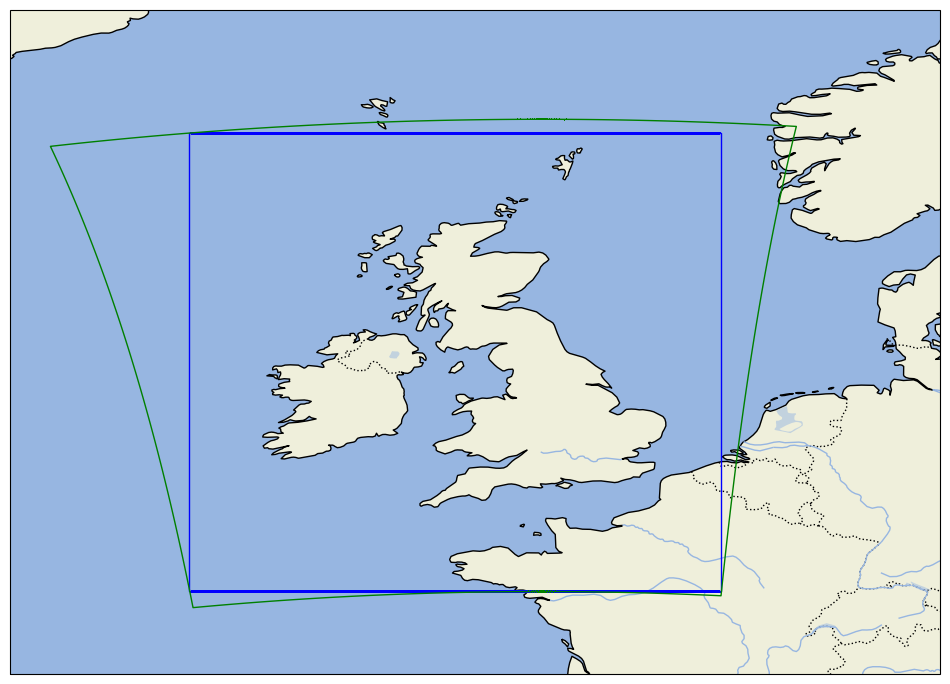

In [27]:
import cartopy.feature as cfeature
import shapely.geometry as sgeom
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-18, 10, 45, 65], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

polygon = sgeom.Polygon(shell=[(-12.6,47.5),(-12.6,61.3),(3.4,61.3),(3.4,47.5)])

ax.add_geometries([polygon], ccrs.PlateCarree(),facecolor="#FF000000",edgecolor="blue")

ds = xr.open_dataset("1000m.nc")

def perimeter(v):
    p1 = ds[v][0,:].data.tolist()  # S,W=>E = SE
    p2 = ds[v][:,-1].data.tolist() # E,S=>N = NE
    p3 = ds[v][-1,:].data.tolist() # N,W=>E
    p3.reverse()                   # N,E=>W = NW
    p4 = ds[v][:,0].data.tolist()  # W,S=>N
    p4.reverse()                   # W,N=>S = SW
    return p1+p2+p3+p4

lats = perimeter("lat")
lons = perimeter("lon")

lon_lats = [(lons[idx],lats[idx]) for idx in range(len(lons))]
print(len(lon_lats))
polygon2 = sgeom.Polygon(shell=lon_lats)

ax.add_geometries([polygon2], ccrs.PlateCarree(),facecolor="#FF008000",edgecolor="green")


